## Question 2
### Import Libaraies

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80,80

### Read train and test dataset as string

In [2]:
train_dataset = pd.read_csv('hayes-roth.data', dtype=str, header=None, names=['name', 'hobby', 'age', 'education', 'status', 'class'])
test_dataset = pd.read_csv('hayes-roth.test', dtype=str, header=None, names=['hobby', 'age', 'education', 'status', 'class'])

### Separating input and output of train and test

In [3]:
X_train = train_dataset.drop(['name', 'class'], axis=1)
y_train = train_dataset['class']

X_test = test_dataset.drop(['class'], axis=1)
y_test = test_dataset['class']

### Decision Tree classification and plot

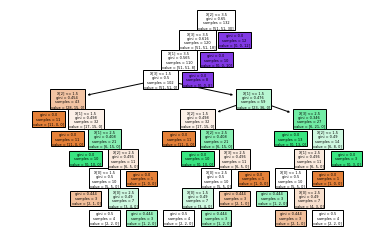

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf, filled=True)
plt.show()

### A) Prediction, Confusion matrix and Classification report

In [5]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  3  0]
 [ 1 12  0]
 [ 0  0  1]]
              precision    recall  f1-score   support

           1       0.92      0.79      0.85        14
           2       0.80      0.92      0.86        13
           3       1.00      1.00      1.00         1

    accuracy                           0.86        28
   macro avg       0.91      0.90      0.90        28
weighted avg       0.87      0.86      0.86        28



### B) Find optimal height using K-Fold cross validation

In [6]:
depth = []
for i in range(4, 11):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    scores = cross_val_score(clf, X_train, y_train, cv = 10)
    depth.append((i, scores.mean()))
print(depth)

[(4, 0.5917948717948718), (5, 0.6435897435897436), (6, 0.8471794871794872), (7, 0.8415384615384613), (8, 0.7646153846153847), (9, 0.7876923076923077), (10, 0.803076923076923)]


 we can see that optimal height equals to 6

### Prediction, Confusion matrix and Classification report on optimal height

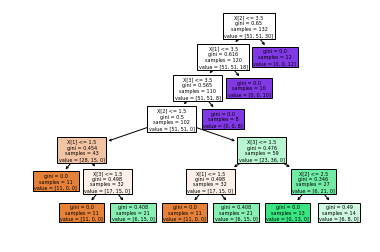

[[ 7  7  0]
 [ 0 13  0]
 [ 0  0  1]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67        14
           2       0.65      1.00      0.79        13
           3       1.00      1.00      1.00         1

    accuracy                           0.75        28
   macro avg       0.88      0.83      0.82        28
weighted avg       0.84      0.75      0.73        28



In [7]:
clf = tree.DecisionTreeClassifier(max_depth = 6)
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf, filled=True)
plt.show()


y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

We can see that accuracy decreased, but precisiot increased. That's because the size of train dataset is low.

## Question 3
### Import libraries

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import accuracy_score

### Read Dataset

In [9]:
dataset = pd.read_csv('haberman.data', header=None, names=['age', 'year', 'postitive', 'status'])

### Split input and output

In [10]:
X = dataset.drop('status', axis=1)
y = dataset['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Iterate over K for KNN algorithm

In [11]:
train_errors = []
test_errors = []

train_accuracies = []
test_accuracies = []

for k in range(1, 40):

    neigh = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
    neigh.fit(X_train, y_train)
    
    pred_train = neigh.predict(X_train)
    train_errors.append(math.sqrt(mean_squared_error(y_train, pred_train)))
    train_accuracies.append(accuracy_score(y_train, pred_train))

    pred_test = neigh.predict(X_test)
    test_errors.append(math.sqrt(mean_squared_error(y_test, pred_test))) 
    test_accuracies.append(accuracy_score(y_test, pred_test))

### Plot error of each K

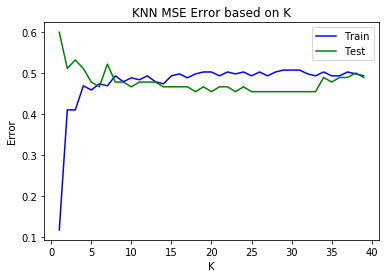

In [12]:
ax = plt.gca()

ax.plot(range(1, 40), np.array(train_errors), 'b')
ax.plot(range(1, 40), np.array(test_errors), 'g')

rcParams['figure.figsize'] = 10, 6

plt.xlabel('K')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.title('KNN MSE Error based on K')
plt.show()

### Plot accuracy of each K

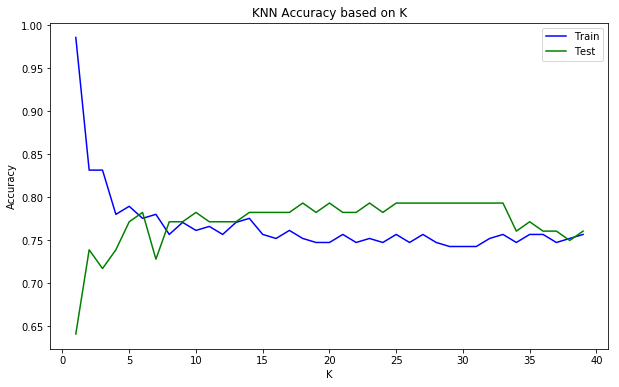

In [13]:
ax = plt.gca()

ax.plot(range(1, 40), np.array(train_accuracies), 'b')
ax.plot(range(1, 40), np.array(test_accuracies), 'g')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.title('KNN Accuracy based on K')
plt.show()

In lower sizes of K, accuracy is higher and in higher sizes of K, accuracy decreases. That's because in higher sizes of K, we have more samples to compare and some of them may be in the other class. So, if neighbors contains items of other class more than right class, the result is wrong and eventually accuracy decreases. In the following plot we can see the classification visualization for some values of K:

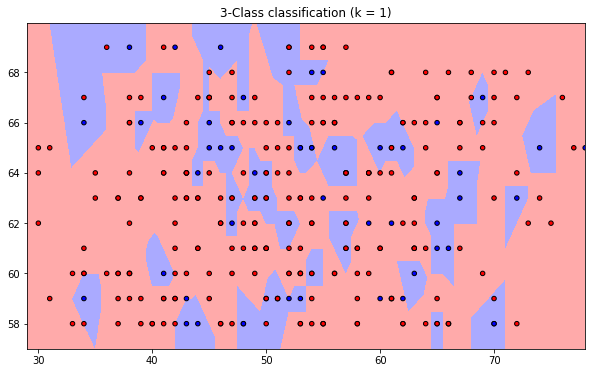

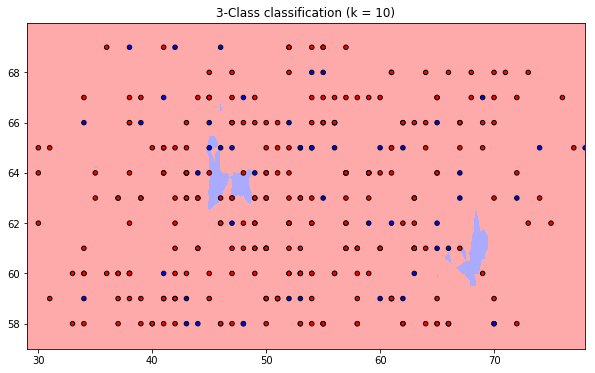

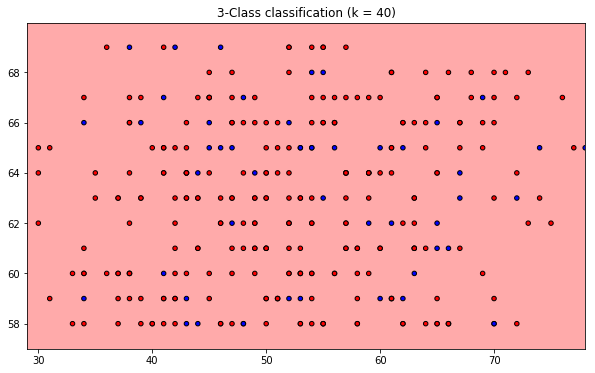

In [14]:
from matplotlib.colors import ListedColormap
n_neighbors = [1, 10, 40]
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_plot = X_train[['age', 'year']]

for n_neighbor in n_neighbors:
    clf = KNeighborsClassifier(n_neighbor)
    clf.fit(X_plot, y_train)

    x_min, x_max = X_plot['age'].min() - 1, X_plot['age'].max() + 1
    y_min, y_max = X_plot['year'].min() - 1, X_plot['year'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X['age'], X['year'], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbor))

plt.show()

As we can see in above figures, in lower values of K, classification is more accurate.

### Find optimal K using K-Fold cross validation

In [15]:
cv_scores = []
neighbors = list(range(1, 40, 1))
for k in neighbors:
    neigh = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(neigh, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

mse = [1 - x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]

print("The optimal number of neighbors is {}".format(optimal_k))

plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()


The optimal number of neighbors is 11
